# <center>Introduction to Dimensionality Reduction</center>
<div style="text-align: right"> By - Mohit Kumar</div>
<div style="text-align: right">Date - 14th Oct 2018</div>

***

## Index

-  **1. Introduction**
-  **2.  Data Description**
    - 2.1 Dataset - MNIST
-  **3. Data Preperation** 
    -  3.1 Data Load
    -  3.2 Data Sneakpeak
    -  3.3 Split Input and Output Dimension
    -  3.4 Null/Missing values analysis
    -  3.5 Data Standardization
-  **4. PCA (Principal Component Analysis)**
    -  4.1 Covariance Matrix
    -  4.2 Eighen Values and Vector 
        -  4.2.a Analyzing new Dimensionality and % of variance retained
    -  4.3 Data Visualization with 2 dimensions
-  **5. PCA using Scikit-Learn**
    -  5.1 Configuring the model.
    -  5.2 Binding model to dataset
    -  5.3 Data Visualization
-  **6. t-SNE using Scikit-Learn**
    -  6.1 Configuring the model.
    -  6.2 Binding model to dataset
    -  6.3 Data Visualization

### 1. Introduction

There are often too many input variables on the basis of which final output is predicted. The larger the input feature, the harder it is to visualize the dataset and build a model on top of that. Point to note is, most of these features are redundant and don't convey too much as far as output variable is concerned. This is where dimensionality reduction algorithms come into play. Dimensionality reduction is the process of reducing the number of random variables under consideration, by obtaining a set of principal variables.

### 2. Data Description

Dataset - MNIST <br>
Source  - https://www.kaggle.com/c/digit-recognizer/data <br>
Description - 
    -  MNIST or Modified National Institute of Standards and Technology is the largest dataset of handwritten digits. 
    -  It has 42000 training images and 28000 testing images. 
    -  Images were normalized to fit a 28*28 pixel bounding box.
    -  This 28*28 pixel is flattened to have 1*784 bounding box as a single data point. 
    -  Therefore, we have dataset with 42000 rows(data point) and 784 columns (dimensions)

#### Import Packages

In [1]:
#Import Packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn import decomposition
from sklearn.manifold import TSNE

from scipy.linalg import eigh

### 3. Data Preperation

#### 3.1 Load Data

In [2]:
#Read Dataset
rawdata = pd.read_csv('MNIST/train.csv')

#### 3.2 Data Sneakpeak

In [3]:
#Check dataset shape and some records
print('Dataset has %d rows and %d columns' % (rawdata.shape[0] ,rawdata.shape[1]))
print('\n Below are sample 5 records in dataset -')
rawdata.head()


Dataset has 42000 rows and 785 columns

 Below are sample 5 records in dataset -


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### 3.3 Split Input dimensions and Output Variable into different DataFrame

In [4]:
#Input Dimension
raw_X = rawdata.drop('label',axis = 1)

#Output Variable
raw_Y = rawdata['label']

#Shape of new input and output df
print('Input Dataset has %d rows and %d columns' % (raw_X.shape[0] ,raw_X.shape[1]))
print('Output Dataset has %d rows and %d columns' % (raw_Y.shape[0] , 1))

print('\nFrequency of value in output label -')
print(raw_Y.value_counts())

Input Dataset has 42000 rows and 784 columns
Output Dataset has 42000 rows and 1 columns

Frequency of value in output label -
1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64


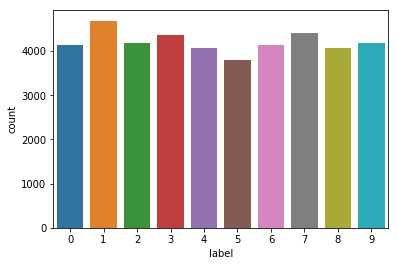

In [5]:
#Plot - Output variable value count
sns.countplot(raw_Y)

**Observation** <br>
It is a fairly balanced dataset with each output label having anywhere between 9 to 11% representation.

#### Check data split accuracy - ploting graph between Input Dimension and Output Variable

Value in Input Image -


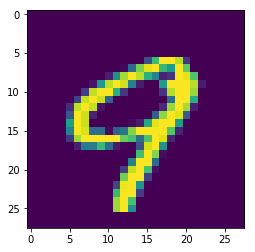

Value in Output Label is -
9


In [6]:
#size of figure
plt.figure( figsize = (4,4))

#sample index value
idx = 100

value_in_x = raw_X.iloc[idx].as_matrix().reshape(28,28)
plt.imshow(value_in_x)

print('Value in Input Image -')
plt.show()

print('Value in Output Label is -')
print(raw_Y[idx])

Thus each index in raw_X corresponds to same index in raw_Y

#### 3.4 Check for Null or missing values

In [7]:
print(raw_X.isnull().any().any())
print(raw_Y.isnull().any().any())

False
False


**Observation** <br>
No Null values present in input and output variable. 

#### 3.5 Input Data Standardization 
Making the mean of dataset to 0 and standard deviation to 1. 

In [8]:
#Standardizing Input Date
stan_X = StandardScaler().fit_transform(raw_X)

print(stan_X.shape)

(42000, 784)


### 4. PCA (Principal Component Analysis) -

Steps of PCA -
1. Find the covarient matrix using standardized dataset. 
2. Find eighen values and eighen vector
3. Using the Eighen vector, find new dimensions. 

#### 4.1 Covariance Matrix

In [9]:
#covariance matrix
covar_mmatrix = np.matmul(stan_X.T, stan_X)

print('Multiplying %s with %s gives covarient matrix of shape -' %( stan_X.T.shape,stan_X.shape))
print(covar_mmatrix.shape)

Multiplying (784, 42000) with (42000, 784) gives covarient matrix of shape -
(784, 784)


#### 4.2 Eighen Value and Vector

Text(0.5,1,'% of Info Retained')

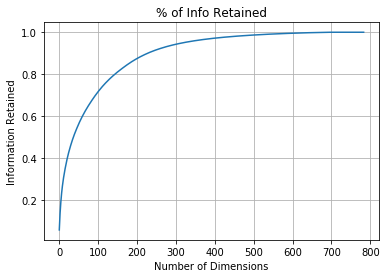

In [10]:
#Finding all the 784 eighen values
eigh_val_784, eigh_vect_784 = eigh(covar_mmatrix, eigvals = (0,783))

#Sorting eighen values in descending order
eigh_val_784_sort = eigh_val_784[::-1]

eigh_x = eigh_val_784_sort 
eigh_y = np.cumsum(eigh_val_784_sort)

cum_exp_var = eigh_y / sum(eigh_val_784_sort)

plt.figure(1, figsize=(6, 4))

plt.grid()

# Plot to display Percentage of Information Retained by number of dimensions**
plt.plot(cum_exp_var)
plt.xlabel('Number of Dimensions')
plt.ylabel('Information Retained')
plt.title('% of Info Retained')


**Observation** <br>
Just by using 200 dimensions we can retain almost 90% of the information. 

**Note - ** <br>
Using the top 2 dimensions (principal components) for basic visualization that is -

In [11]:
# Top 2 Eighen values and there corresponding eighen Vectors
eigh_val_2, eigh_vect_2 = eigh(covar_mmatrix, eigvals = (782,783))

print(eigh_vect_2.shape)

perc_info_retain = (np.sum(eigh_val_2) / np.sum(eigh_val_784))
print('% Information Retained with just 2 Dimensions = {0:.2%}'.format(perc_info_retain))

(784, 2)
% Information Retained with just 2 Dimensions = 9.86%


In [12]:
#Eighen transpose
eigh_vect_2_T = eigh_vect_2.T

#New Coordinates
new_cord_matrix = np.matmul(eigh_vect_2_T, stan_X.T)

print('Multiplying Eighen Matrix %s with Standardized datased %s gives new coordinate matrix with shape -' %( eigh_vect_2_T.shape,stan_X.T.shape))
print(new_cord_matrix.shape)


Multiplying Eighen Matrix (2, 784) with Standardized datased (784, 42000) gives new coordinate matrix with shape -
(2, 42000)


**Observation** <br>
The 2 rows represents the 2 new coordinates. 42000 columns represents 42000 datapoints. <br>

In [13]:
#Joining new input dimennsions with output variable.
new_cord_trans_XY = np.vstack((new_cord_matrix ,raw_Y)).T
print(new_cord_trans_XY.shape)

(42000, 3)


In [14]:
#Converting nupmy object into Dataframe
final_df = pd.DataFrame(data = new_cord_trans_XY, columns = ('1st_Component' , '2nd_Component', 'Label'))

In [15]:
print('Dataset has %d rows and %d columns' % (final_df.shape[0] ,final_df.shape[1]))
print('\n Below are sample 5 records in dataset -')
final_df.head()

Dataset has 42000 rows and 3 columns

 Below are sample 5 records in dataset -


,1st_Component,2nd_Component,Label
0,-5.226445,-5.140478,1.0
1,6.032996,19.292332,0.0
2,-1.705813,-7.644503,1.0
3,5.836139,-0.474207,4.0
4,6.024818,26.559574,0.0


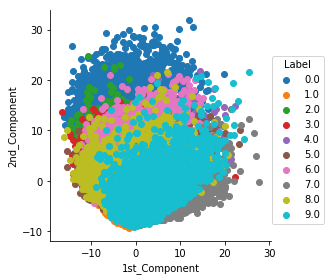

In [16]:
#Plot Scatter Plot on Final_df
sns.FacetGrid( final_df, hue = 'Label', size = 4) \
.map( plt.scatter, '1st_Component', '2nd_Component').add_legend()
plt.show()

**Observation**
Thus, using just 2 principal component, we can see some clear distinction between MNIST output labels.

## 5. PCA using Scikit-Learn Module

All the computations done above can be minimized using inbuild PCA module in Sklearn. 

In [17]:
#configuring model
#n_components signifies how many new dimensions pr principal components we want to retain.
pca = decomposition.PCA(n_components = 2)

#binding configured PCA to our dataset.
pca_data = pca.fit_transform(stan_X)

print(pca_data.shape)

(42000, 2)


Observe how all the computations to calculate covariance matrix, eighen vector and new coordinates have been taken care of by the Sklearn Module itself. 

In [18]:
#Joining pca transformed data with output data.
pca_sklearn_final_data = np.vstack((pca_data.T , raw_Y)).T

#creating dataframe
pca_skborn_df = pd.DataFrame(pca_sklearn_final_data, columns = ('1st_Component' , '2nd_Component', 'Label'))

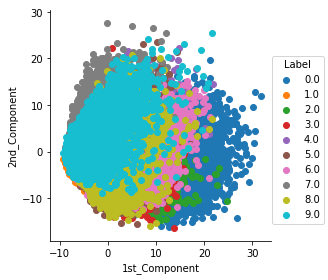

In [19]:
sns.FacetGrid( pca_skborn_df, hue = 'Label', size = 4) \
.map( plt.scatter, '1st_Component', '2nd_Component').add_legend()

plt.show()

**Observation** <br>
The distinction in output labels for both the plots is almost similar. 

## 6. T-SNE

T-SNE is state of the art model for dimensionality reduction. <br>
It stands for T-distributed Stochaitic Neighbourhood Embedding and uses the concept of transforming higher dimensions into lower dimensions using neighbourhood distance.

In [21]:
# configuring model
# the number of components = 2
# perplexity = 30
# number of iterations for the optimization = 300
tsne_model = TSNE(n_components = 2, perplexity = 30, n_iter =300, random_state = 0)
tsne_data = tsne_model.fit_transform(stan_X)

tsne_sklearn_final_data = np.vstack((tsne_data.T , raw_Y)).T

tsne_skborn_df = pd.DataFrame(tsne_sklearn_final_data, columns = ('1st_Component' , '2nd_Component', 'Label'))

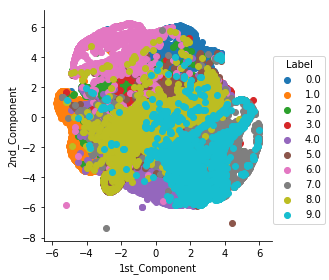

In [22]:
#Plot graph
sns.FacetGrid( tsne_skborn_df, hue = 'Label', size = 4) \
.map( plt.scatter, '1st_Component', '2nd_Component').add_legend()

plt.show()

**Observation**
As evident, T-SNE gives more clearer distinction than PCA.